# Segment and Labeling
<p> - Segment (Phân chia): là việc chia hình ảnh thành nhiều phần và gán nhãn cho chúng. </p>
<p> - Để việc phân loại và gán nhãn được hiệu quả thì trước đó chúng ta cần có các bước tiền xử lý dữ liệu hình ảnh, cụ thể ở đây là áp dụng các Filter và tạo Mask cho dữ liệu ban đầu để có thể làm nổi bật được đối tượng, từ đó việc phân loại và gán nhãn sẽ hiệu quả hơn.  </p>
<p> - Thư viện Scipy cung cấp cho ta hàm ndi.label() giúp gắn nhãn từng đối tượng </p>

In [91]:
import imageio
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np

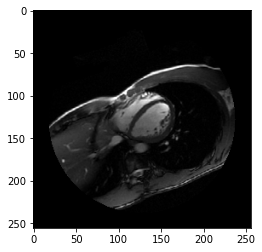

In [92]:
# Đọc ảnh
im = imageio.imread('SCD2001_MR_117.dcm')
plt.imshow(im , cmap='gray')
plt.show()

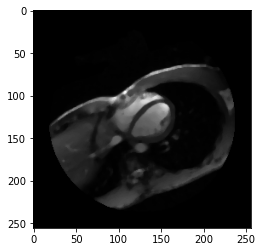

In [93]:
# Tạo một filter
im_filt = ndi.median_filter(im, size=5)
plt.imshow(im_filt, cmap= 'gray')
plt.show()

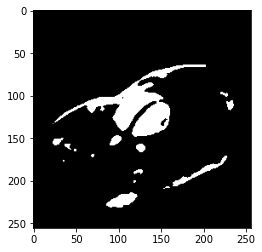

In [94]:
# Tạo một mask
mask = np.where(im_filt>60, 1, 0)
plt.imshow(mask, cmap= 'gray')
plt.show()

Số Labels: 17


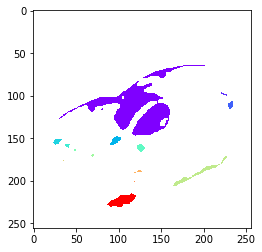

In [95]:
# Gán nhãn cho các đối tượng trong mask
labels, nlabels = ndi.label(mask)
print('Số Labels:',nlabels)

# Tạo một lớp phủ cho từng nhãn
overlay = np.where(labels>0, labels, np.nan)

plt.imshow(overlay, cmap='rainbow')
plt.show()

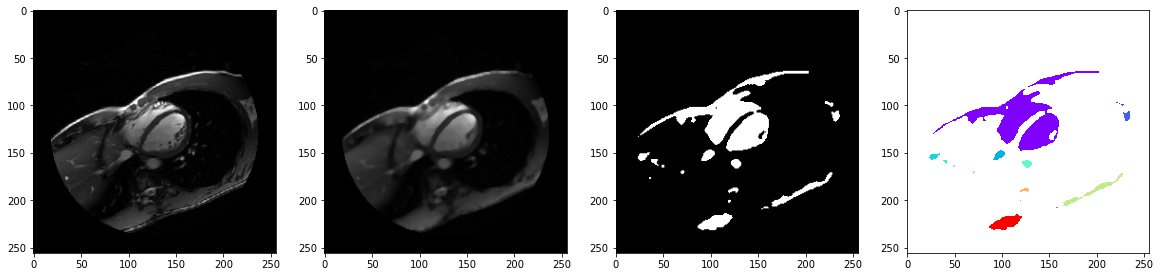

In [96]:
fig, axes = plt.subplots(1,4,figsize = (20,5))
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(im_filt, cmap= 'gray')
axes[2].imshow(mask, cmap= 'gray')
axes[3].imshow(overlay, cmap='rainbow')
    
plt.show()

# Select and Extract Objects
<p> - Các đối tượng sau khi đã được gán nhãn, chúng ta luôn có thể gọi ra đối tượng đó thông qua nhãn của nó, cụ thể khi ta truy xuất đối tượng thông qua nhãn nó sẽ chọn toàn bộ pixel của đối tượng đó cùng một lúc. </p>

In [98]:
# Gán nhãn cho các đối tượng
labels, nlabels = ndi.label(mask)

# Chọn giá trị nhãn liên kết với đối tượng mong muốn
lv_val = labels[128, 128]

# Tạo mask của các pixel phù hợp
lv_mask = np.where(labels == lv_val, 1, 0)

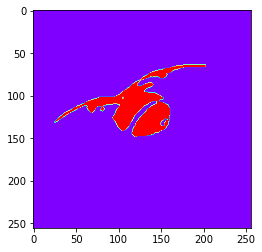

In [99]:
plt.imshow(lv_mask, cmap = 'rainbow')
plt.show()

</p> - Trích xuất các đối tượng từ hình ảnh gốc giúp loại bỏ các pixel không liên quan và cung cấp hình ảnh mới có thể được phân tích độc lập. Phạm vi của các chỉ số pixel bao quanh đối tượng được gọi là hộp giới hạn. </p>
<p> - Thư viện Scipy cung cấp hàm ndi.find_objects() giúp trả về một danh sách tọa độ của hộp giới hạn. </p>

In [100]:
bboxes = ndi.find_objects(labels) 
bboxes

[(slice(64, 149, None), slice(25, 203, None)),
 (slice(96, 102, None), slice(220, 229, None)),
 (slice(106, 118, None), slice(227, 236, None)),
 (slice(133, 134, None), slice(23, 24, None)),
 (slice(147, 159, None), slice(90, 104, None)),
 (slice(150, 159, None), slice(23, 36, None)),
 (slice(157, 164, None), slice(37, 45, None)),
 (slice(157, 167, None), slice(121, 132, None)),
 (slice(163, 166, None), slice(48, 51, None)),
 (slice(169, 173, None), slice(68, 72, None)),
 (slice(171, 207, None), slice(164, 228, None)),
 (slice(176, 178, None), slice(35, 37, None)),
 (slice(187, 193, None), slice(118, 129, None)),
 (slice(200, 203, None), slice(118, 121, None)),
 (slice(207, 209, None), slice(155, 161, None)),
 (slice(209, 210, None), slice(153, 155, None)),
 (slice(214, 232, None), slice(86, 123, None))]

In [101]:
# Số hộp giới hạn bằng số nhãn
print('Số nhãn (labels): ',nlabels)
print('Số hộp giới hạn (bounding box): ',len(bboxes))

Số nhãn (labels):  17
Số hộp giới hạn (bounding box):  17


Số lát cắt của lv_mask: 1
Hộp giới hạn của lv_mask: (slice(64, 149, None), slice(25, 203, None))


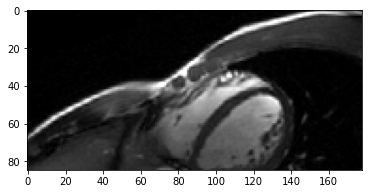

In [102]:
# Tìm hộp giới hạn tương ứng với lv_mask
bboxes = ndi.find_objects(lv_mask)
print('Số lát cắt của lv_mask:', len(bboxes))
print('Hộp giới hạn của lv_mask:', bboxes[0])
plt.imshow(im[bboxes[0]] , cmap='gray')
plt.show()

# Measuring intensity
<p> - Trong thư viện Scipy cung cấp cho chúng ta nhiều chức năng đo cho đối tượng: </p>

In [106]:
print('mean: ', ndi.mean(im))
print('median: ', ndi.median(im))
print('sum: ', ndi.sum(im))
print('max: ', ndi.maximum(im))
print('variance: ', ndi.variance(im))

mean:  15.834884643554688
median:  1.0
sum:  1037755
max:  255
variance:  1087.2698102833237


<p> - Ta có thể điều chỉnh các phép đo sao cho phù hợp với các bộ pixel: </p>
<ul>
    <li> Việc chỉ định 'nhãn' sẽ hạn chế  được việc chọn các pixel không liên quan mà chỉ tập trung vào đối tượng cần tính toán </li>
</ul>

In [108]:
print('mean_labels: ', ndi.mean(im,labels))
print('median_labels: ', ndi.median(im,labels))
print('sum_labels: ', ndi.sum(im,labels))
print('max_labels: ', ndi.maximum(im,labels))
print('variance_labels: ', ndi.variance(im,labels))

mean_labels:  105.61701261701262
median_labels:  90.0
sum_labels:  519002
max_labels:  255
variance_labels:  2380.740581551733


<ul>
    <li> Chúng ta có thể chỉ cần tính toán các giá trị nhãn mong muốn thông quan việc chỉ định các giá trị chỉ mục </li>
</ul>

In [109]:
print('mean_labels[1,2]: ', ndi.mean(im,labels,index=[1,2]))
print('median_labels[1,2]: ', ndi.median(im,labels,index=[1,2]))
print('sum_labels[1,2]: ', ndi.sum(im,labels,index=[1,2]))
print('max_labels[1,2]: ', ndi.maximum(im,labels,index=[1,2]))
print('variance_labels[1,2]: ', ndi.variance(im,labels,index=[1,2]))

mean_labels[1,2]:  [116.65741497  69.36666667]
median_labels[1,2]:  [102.   69.5]
sum_labels[1,2]:  [428716.   2081.]
max_labels[1,2]:  [255  87]
variance_labels[1,2]:  [2572.57025454   75.09888889]
